In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('../')

In [42]:
import json
import pandas as pd
import datetime

from scraper import (
    get_slug_names
    )

In [3]:
slug_names = get_slug_names()

In [4]:
slug_names[0]

'cryptopunks'

In [3]:
with open('/home/viktor/python/BachelorThesis/bachelorthesis/historic_data/cryptopunks.txt') as f:
    lines = f.readlines()

In [4]:
txt = json.loads(lines[0])

In [28]:
cryptopunks = pd.DataFrame.from_records(txt["data"]["tradeHistory"]["results"])
cryptopunks["quantity_currency"] = None
cryptopunks["currency"] = None

for i in cryptopunks.index:
    cryptopunks_decimals = cryptopunks["volume"][i]["asset"]["decimals"]
    cryptopunks_quote_currency = cryptopunks["volume"][i]["asset"]["symbol"]
    cryptopunks_quantity = int(cryptopunks["volume"][i]["quantity"])/10**cryptopunks_decimals
    cryptopunks.at[i, "quantity_currency"] = cryptopunks_quantity
    cryptopunks.at[i, "currency"] = cryptopunks_quote_currency
    cryptopunks["quantity_currency"] = cryptopunks["quantity_currency"].astype(float)
cryptopunks["bucketEnd"] = pd.to_datetime(cryptopunks["bucketEnd"])
cryptopunks = cryptopunks.set_index("bucketEnd")
cryptopunks.index = cryptopunks.index.date

<AxesSubplot:title={'center':'cryptopunks quantity measured in ETH'}>

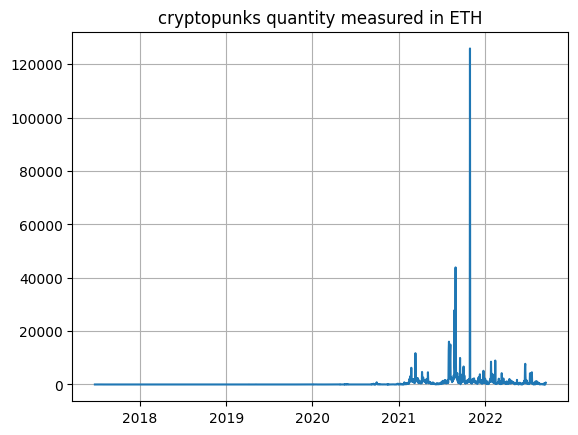

In [29]:
cryptopunks["quantity_currency"].plot(grid=True, title="cryptopunks quantity measured in ETH")

In [30]:
cryptopunks["quantity_currency"].describe()

count      1516.000000
mean        653.987543
std        3761.452650
min           0.000000
25%           0.750000
50%          11.230000
75%         546.345000
max      125922.107525
Name: quantity_currency, dtype: float64

In [45]:
start = datetime.date(2020, 6, 1)
cryptopunks[start:].describe()

,quantity,quantity_currency
count,804.000000,804.000000
mean,21.221393,1229.097494
std,36.370834,5097.875933
min,1.000000,0.000000
25%,5.000000,104.867500
50%,11.000000,470.050000
75%,23.000000,1072.357500
max,354.000000,125922.107525


In [46]:
cryptopunks.quantity_currency.sum()

991445.1158933139